In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path       
from datetime import datetime 
import matplotlib.pyplot as plt

In [2]:
base_dir = os.getcwd()
base_dir

'/home/sobottka/BSE/Master_Thesis/bse-thesis-synthetic-data'

In [3]:
os.listdir()

['TimeGAN_results',
 '.gitignore',
 '3_2_Quant_GAN.ipynb',
 'LICENSE',
 '4_Model_Comparative.ipynb',
 '0_1_Download_Yahoo_Finance_Data.py',
 'data',
 '0_2_Data_Exploration_Nvidia.ipynb',
 '2_3_1_LLM_Fine_Tunning_Model_Trainning.ipynb',
 'synthetic_vs_real.csv',
 'LLMs_results',
 '3_4_GANs_paper.ipynb',
 '2_3_2_LLM_Fine_Tunning_Model_Inference.ipynb',
 'README.md',
 '.git',
 'FINGAN_results',
 'papers',
 '3_1_Time_GANs.ipynb',
 'Images',
 'models',
 '2_2_LLM_Few_Shot.ipynb',
 '.github',
 '5_Paper_Calculate_LogReturns.py',
 'lora-deepseek',
 'Paper_for_post_research',
 '0_3_Optiver_datapreprocessing_BRICS_v0.ipynb',
 '2_1_LLM_Zero_Shot.ipynb',
 '3_3_Fin_GAN.ipynb',
 'Quant_GAN_results']

In [4]:
next_folder = os.chdir('data/processed_files')

In [5]:
current_path = os.getcwd()
current_path

'/home/sobottka/BSE/Master_Thesis/bse-thesis-synthetic-data/data/processed_files'

In [7]:
os.listdir()

['valid',
 'SHANGHAI_processed.csv',
 'train',
 'test',
 'BOVESPA_processed.csv',
 'MSCI_processed.csv',
 'FTSE_JSE_processed.csv',
 'NIFTY50_processed.csv']

In [17]:
files = os.listdir()
train_dfs = {}


for i in files: 
    if i.endswith('csv'):
        key_name = f"train_pd_{i.split('_')[0]}"
        train_dfs[key_name] = pd.read_csv(i)

train_dfs

{'train_pd_SHANGHAI':             Date    Price      Open      High       Low    Vol. Change %  \
 0     01/02/2024  2962.28  2,972.77  2,976.27  2,962.28  30.41B   -0.43%   
 1     01/02/2025  3262.56  3,347.94  3,351.72  3,242.09  56.14B   -2.66%   
 2     01/03/2023  3116.51  3,087.51  3,119.86  3,073.05  28.14B    0.88%   
 3     01/03/2024  2967.25  2,957.11  2,971.28  2,953.29  28.55B    0.17%   
 4     01/03/2025  3211.43  3,267.08  3,273.57  3,205.78  51.76B   -1.57%   
 ...          ...      ...       ...       ...       ...     ...      ...   
 1207  12/30/2022  3089.26  3,084.52  3,096.31  3,082.20  21.75B    0.51%   
 1208  12/30/2024  3407.33  3,395.40  3,412.84  3,394.96  45.53B    0.21%   
 1209  12/31/2020  3473.07  3,419.73  3,474.92  3,419.73  33.57B    1.72%   
 1210  12/31/2021  3639.78  3,626.24  3,642.84  3,624.94  32.97B    0.57%   
 1211  12/31/2024  3351.76  3,406.97  3,413.45  3,351.76  50.27B   -1.63%   
 
       LogReturn  
 0           NaN  
 1      0.09655

In [18]:
train_dfs.keys()

dict_keys(['train_pd_SHANGHAI', 'train_pd_BOVESPA', 'train_pd_MSCI', 'train_pd_FTSE', 'train_pd_NIFTY50'])

In [19]:
train_dfs['train_pd_SHANGHAI'].head(1000)

,Date,Price,Open,High,Low,Vol.,Change %,LogReturn
0,01/02/2024,2962.28,"2,972.77","2,976.27","2,962.28",30.41B,-0.43%,NaN
1,01/02/2025,3262.56,"3,347.94","3,351.72","3,242.09",56.14B,-2.66%,0.096553
2,01/03/2023,3116.51,"3,087.51","3,119.86","3,073.05",28.14B,0.88%,-0.045798
3,01/03/2024,2967.25,"2,957.11","2,971.28","2,953.29",28.55B,0.17%,-0.049078
4,01/03/2025,3211.43,"3,267.08","3,273.57","3,205.78",51.76B,-1.57%,0.079081
...,...,...,...,...,...,...,...,...
995,11/01/2023,3023.08,"3,038.18","3,038.33","3,013.93",28.01B,0.14%,0.017984
996,11/01/2024,3272.01,"3,275.58","3,305.32","3,258.73",85.21B,-0.24%,0.079128
997,11/02/2020,3225.12,"3,228.72","3,242.80","3,209.91",22.68B,0.02%,-0.014434
998,11/02/2021,3505.63,"3,543.38","3,559.05","3,477.66",41.76B,-1.10%,0.083400



### Time Handling

Sort by stock_id, time_id (or timestamp). This is critical for rolling features later.

Normalize time:

    Extract useful time features: second_in_day, minute_of_day.

    You’ll need these for intraday seasonality (prices behave differently at open/close).


In [20]:
for key, df in train_dfs.items():
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df = df.set_index("Date").sort_index()
    train_dfs[key] = df  # reassign the modified dataframe


In [21]:
train_dfs['train_pd_BOVESPA']

,Price,Open,High,Low,Vol.,Change %,LogReturn
Date,,,,,,,
2020-10-01,95479,"94,604","95,486","93,599",9.24M,0.93%,-0.426322
2020-10-02,94016,"95,475","95,996","93,897",8.58M,-1.53%,-0.436828
2020-10-05,96089,"94,019","96,414","93,984",8.62M,2.20%,-0.315950
2020-10-06,95615,"96,091","97,405","95,211",11.30M,-0.49%,-0.169568
2020-10-07,95526,"95,616","96,380","94,881",9.83M,-0.09%,-0.178290
...,...,...,...,...,...,...,...
2025-09-25,145306,"146,492","146,519","145,187",8.29B,-0.81%,0.099181
2025-09-26,145447,"145,326","146,235","145,146",6.34B,0.10%,0.089387
2025-09-29,146337,"145,447","147,558","145,447",7.07B,0.61%,0.227463


In [22]:
train_dfs['train_pd_BOVESPA'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1246 entries, 2020-10-01 to 2025-10-01
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1246 non-null   int64  
 1   Open       1246 non-null   object 
 2   High       1246 non-null   object 
 3   Low        1246 non-null   object 
 4   Vol.       1246 non-null   object 
 5   Change %   1246 non-null   object 
 6   LogReturn  1245 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 77.9+ KB


In [23]:
#Checking for duplicates

print(train_dfs['train_pd_BOVESPA'].duplicated())

Date
2020-10-01    False
2020-10-02    False
2020-10-05    False
2020-10-06    False
2020-10-07    False
              ...  
2025-09-25    False
2025-09-26    False
2025-09-29    False
2025-09-30    False
2025-10-01    False
Length: 1246, dtype: bool


### Missing Values (Context-aware)

Prices (*_price): forward-fill within each (stock_id, date_id); if the very first row is missing, back-fill from the first available in that day, else drop that row (rare).

Sizes (*_size): forward-fill; if a day starts with NaNs, set to 0 only if your EDA showed that means “no displayed size” rather than missing.

Flags (imbalance_buy_sell_flag): treat 0 as “no imbalance,” not missing. If NaN exists, map NaN→0 after checking frequency.

Keep a mask column was_nan_any for later error analysis (missingness can be predictive in microstructure).




In [24]:
# Different methods to count the number of the rows
for key, df in train_dfs.items():
    print(key, df.isna().sum())
    print(key, len(df)) #number of rows
    print(f"Percentage of missing values in the column volume for the {key}: {(df['Vol.'].isna().sum() / len(df))*100}%")
    # print(key, df.shape[0]) # number of rows, shape [1] give the number of columns
    # print(key, df.count() ) # counts non-NAN values per column
    # print(key, df.count().sum() )#counts all non-NAN values in the whole DataFrame

train_pd_SHANGHAI Price        0
Open         0
High         0
Low          0
Vol.         0
Change %     0
LogReturn    1
dtype: int64
train_pd_SHANGHAI 1212
Percentage of missing values in the column volume for the train_pd_SHANGHAI: 0.0%
train_pd_BOVESPA Price        0
Open         0
High         0
Low          0
Vol.         0
Change %     0
LogReturn    1
dtype: int64
train_pd_BOVESPA 1246
Percentage of missing values in the column volume for the train_pd_BOVESPA: 0.0%
train_pd_MSCI Price        0
Open         0
High         0
Low          0
Vol.         0
Change %     0
LogReturn    1
dtype: int64
train_pd_MSCI 1256
Percentage of missing values in the column volume for the train_pd_MSCI: 0.0%
train_pd_FTSE Price         0
Open          0
High          0
Low           0
Vol.         19
Change %      0
LogReturn     1
dtype: int64
train_pd_FTSE 1250
Percentage of missing values in the column volume for the train_pd_FTSE: 1.52%
train_pd_NIFTY50 Price        0
Open         0
High    

In [25]:
missing_rows_Vol_FTSE = train_dfs['train_pd_FTSE'][train_dfs['train_pd_FTSE']['Vol.'].isna()]

In [26]:
missing_rows_Vol_FTSE

,Price,Open,High,Low,Vol.,Change %,LogReturn
Date,,,,,,,
2021-03-15,67566.42,"67,875.22","68,028.34","67,566.42",NaN,-0.94%,-0.263276
2021-03-16,67289.37,"67,736.86","67,842.30","67,044.52",NaN,-0.41%,-0.081330
2021-03-19,65911.27,"66,509.12","66,509.12","65,609.58",NaN,-1.24%,-0.299125
2021-03-25,64783.62,"64,876.82","65,400.33","64,503.03",NaN,-0.73%,-0.317422
2022-03-18,74847.63,"74,367.92","74,921.53","74,206.74",NaN,0.98%,0.114654
2022-06-17,65390.88,"66,439.60","66,815.42","65,390.88",NaN,-3.13%,-0.018104
2022-09-19,66474.86,"66,280.54","66,534.69","65,540.16",NaN,-0.16%,-0.461155
2023-01-13,79333.72,"78,848.14","79,527.33","78,848.14",NaN,0.90%,0.043910
2023-02-13,79770.21,"78,859.86","79,770.21","78,859.86",NaN,0.99%,-0.097529


In [27]:
missing_rows_Vol_NIFTY50 = train_dfs['train_pd_NIFTY50'][train_dfs['train_pd_NIFTY50']['Vol.'].isna()]

In [28]:
missing_rows_Vol_NIFTY50

,Price,Open,High,Low,Vol.,Change %,LogReturn
Date,,,,,,,
2022-08-16,17825.25,"17,797.20","17,839.10","17,764.05",NaN,0.72%,0.073442
2023-03-22,17151.90,"17,177.45","17,207.25","17,107.85",NaN,0.26%,-0.009493
2024-01-20,21571.80,"21,706.15","21,720.30","21,541.80",NaN,-0.23%,0.179480
2024-02-19,22122.25,"22,103.45","22,186.65","22,021.05",NaN,0.37%,0.389751


In [29]:
train_dfs['train_pd_FTSE']['Vol.'] = train_dfs['train_pd_FTSE']['Vol.'].ffill()
print(train_dfs['train_pd_FTSE'].isna().sum())


Price        0
Open         0
High         0
Low          0
Vol.         0
Change %     0
LogReturn    1
dtype: int64


In [30]:
train_dfs['train_pd_NIFTY50']['Vol.'] = train_dfs['train_pd_NIFTY50']['Vol.'].ffill()
print(train_dfs['train_pd_NIFTY50'].isna().sum())

Price        0
Open         0
High         0
Low          0
Vol.         0
Change %     0
LogReturn    1
dtype: int64


## Handling Outliers

In [31]:
price_columns = [x for x in train_dfs['train_pd_BOVESPA'].columns]
price_columns

['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'LogReturn']

In [32]:
for key, df in train_dfs.items():
    for i in df.columns:
        print(key, i, df[i].dtype)

train_pd_SHANGHAI Price float64
train_pd_SHANGHAI Open object
train_pd_SHANGHAI High object
train_pd_SHANGHAI Low object
train_pd_SHANGHAI Vol. object
train_pd_SHANGHAI Change % object
train_pd_SHANGHAI LogReturn float64
train_pd_BOVESPA Price int64
train_pd_BOVESPA Open object
train_pd_BOVESPA High object
train_pd_BOVESPA Low object
train_pd_BOVESPA Vol. object
train_pd_BOVESPA Change % object
train_pd_BOVESPA LogReturn float64
train_pd_MSCI Price float64
train_pd_MSCI Open float64
train_pd_MSCI High float64
train_pd_MSCI Low float64
train_pd_MSCI Vol. object
train_pd_MSCI Change % object
train_pd_MSCI LogReturn float64
train_pd_FTSE Price float64
train_pd_FTSE Open object
train_pd_FTSE High object
train_pd_FTSE Low object
train_pd_FTSE Vol. object
train_pd_FTSE Change % object
train_pd_FTSE LogReturn float64
train_pd_NIFTY50 Price float64
train_pd_NIFTY50 Open object
train_pd_NIFTY50 High object
train_pd_NIFTY50 Low object
train_pd_NIFTY50 Vol. object
train_pd_NIFTY50 Change % object

In [33]:
# ...existing code...
for key, df in train_dfs.items():
    for col in price_columns:
        print(key, col)
        # try to coerce column to numeric (handles commas, percent signs if present)
        ser = df[col]
        if ser.dtype == object:
            # remove common thousands separators and percent sign, adjust as needed
            ser_clean = ser.astype(str).str.replace(',', '').str.replace('%', '', regex=False)
            num = pd.to_numeric(ser_clean, errors='coerce')
        else:
            num = pd.to_numeric(ser, errors='coerce')

        # debug: show some non-numeric samples if any
        non_numeric = df.loc[num.isna() & ser.notna(), col].unique()
        if len(non_numeric):
            print("Non-numeric samples (will be coerced to NaN):", non_numeric[:10])

        if num.dropna().empty:
            print("No numeric data available, skipping quantile/clip.")
            continue

        lower = num.quantile(0.005)
        print("lower_bound:",lower)
        upper = num.quantile(0.999)
        print("upper_bound:", upper)

        # optional: write back clipped numeric values (uncomment to enable)
        # df[col] = num.clip(lower, upper)
    # train_dfs[key] = df   # optional reassign if you want to be explicit
# ...existing code...

train_pd_SHANGHAI Price
lower_bound: 2736.04585
upper_bound: 3881.4211600000017
train_pd_SHANGHAI Open
lower_bound: 2732.8125
upper_bound: 3876.09156
train_pd_SHANGHAI High
lower_bound: 2747.8709
upper_bound: 3891.8664600000006
train_pd_SHANGHAI Low
lower_bound: 2710.9467
upper_bound: 3864.9042800000016
train_pd_SHANGHAI Vol.
Non-numeric samples (will be coerced to NaN): ['18.83B' '25.96B' '20.49B' '19.87B' '19.10B' '19.43B' '21.23B' '16.51B'
 '17.76B' '16.60B']
No numeric data available, skipping quantile/clip.
train_pd_SHANGHAI Change %
lower_bound: -2.6572500000000003
upper_bound: 4.497160000000094
train_pd_SHANGHAI LogReturn
lower_bound: -0.23214103409461068
upper_bound: 0.35130248186820967
train_pd_BOVESPA Price
lower_bound: 96004.525
upper_bound: 146403.44
train_pd_BOVESPA Open
lower_bound: 95700.6
upper_bound: 146404.195
train_pd_BOVESPA High
lower_bound: 96751.675
upper_bound: 147464.90000000005
train_pd_BOVESPA Low
lower_bound: 94955.25
upper_bound: 145705.89000000004
train_pd

### Keeping only log return column

In [36]:
for key, df in train_dfs.items():
    df.drop(columns=['Open', 'Price', 'High', 'Low', 'Change %', 'Vol.'], inplace=True)

In [38]:
import seaborn as sns
def plot_graph(x, y, title):
    fig, ax = plt.subplots(1,2, figsize=(12, 8))
    fig.suptitle(title)
    ax[0].set_title('Distribution - Log Return')
    ax[0].hist(y.dropna(), bins=100, density=True)
    # Add a smooth red line
    sns.kdeplot(y.dropna(), ax = ax[0],color='red', linewidth=2)
    ax[1].set_title('Line Plot - Time and Log Return')
    ax[1].plot(x,y)
    fig.tight_layout()
    plt.show()
# ...existing code...

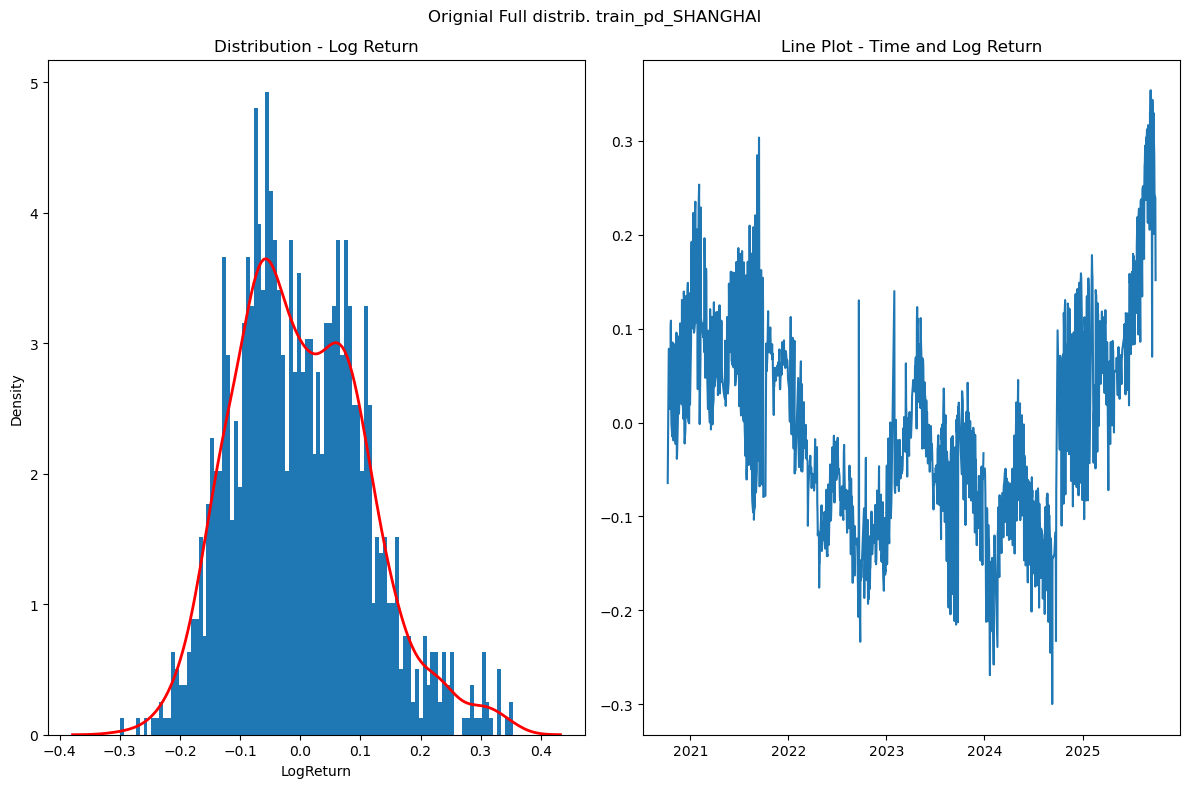

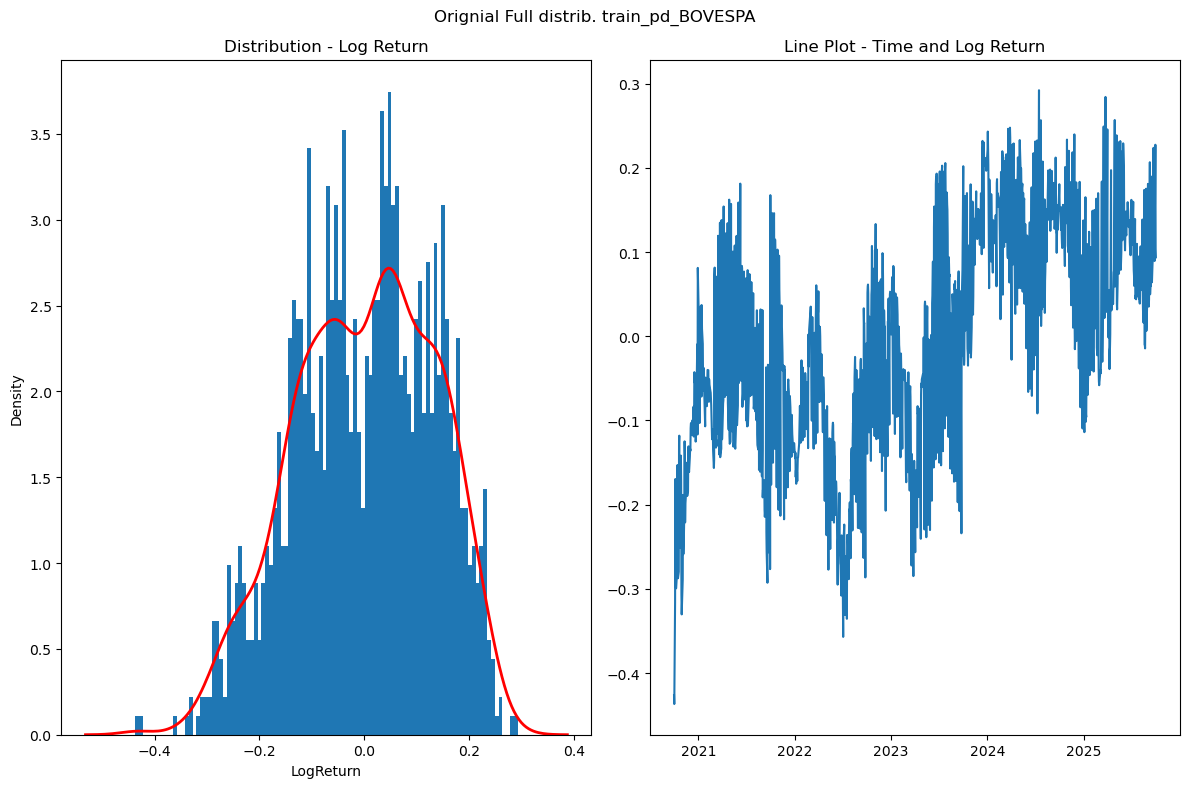

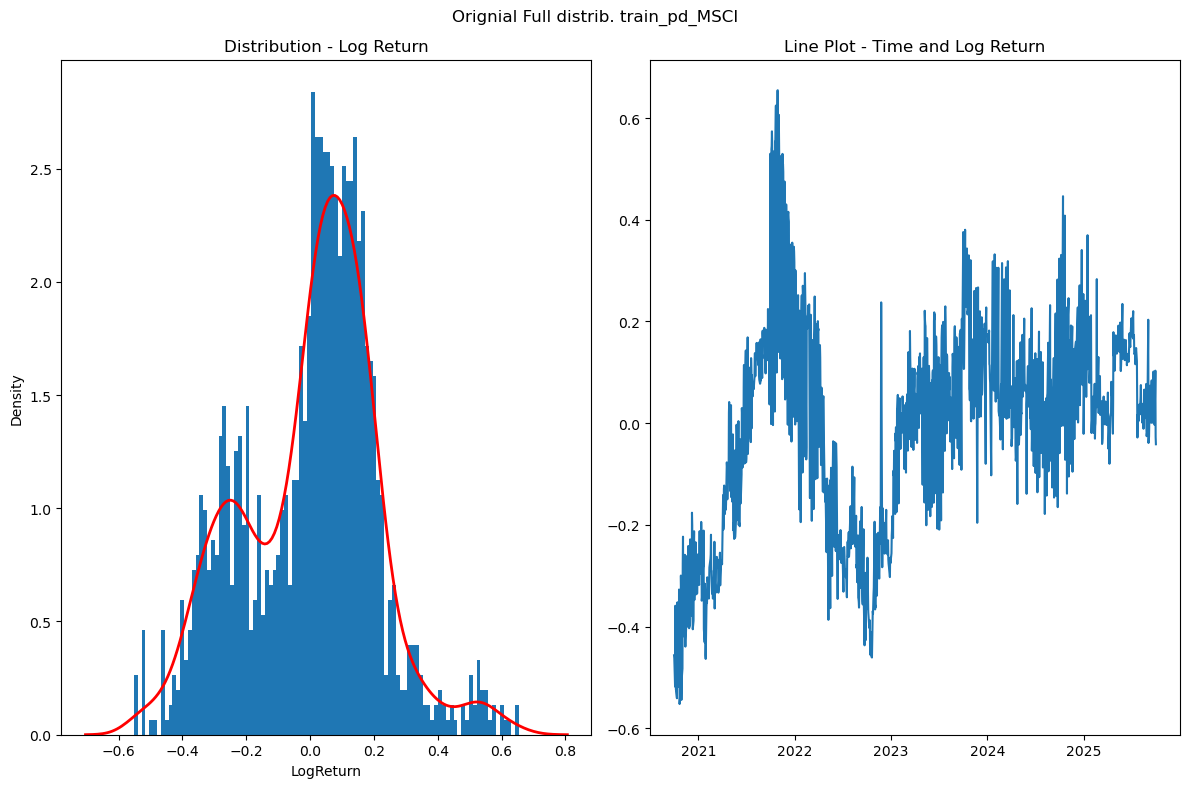

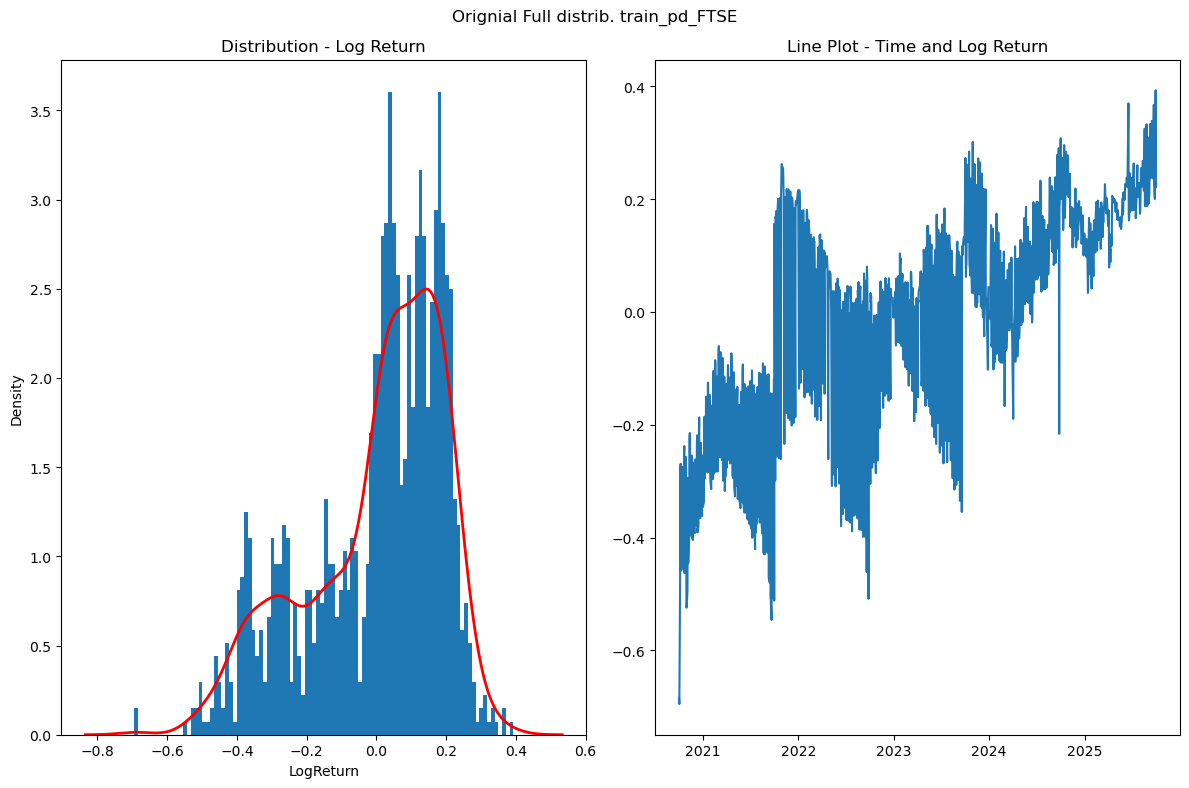

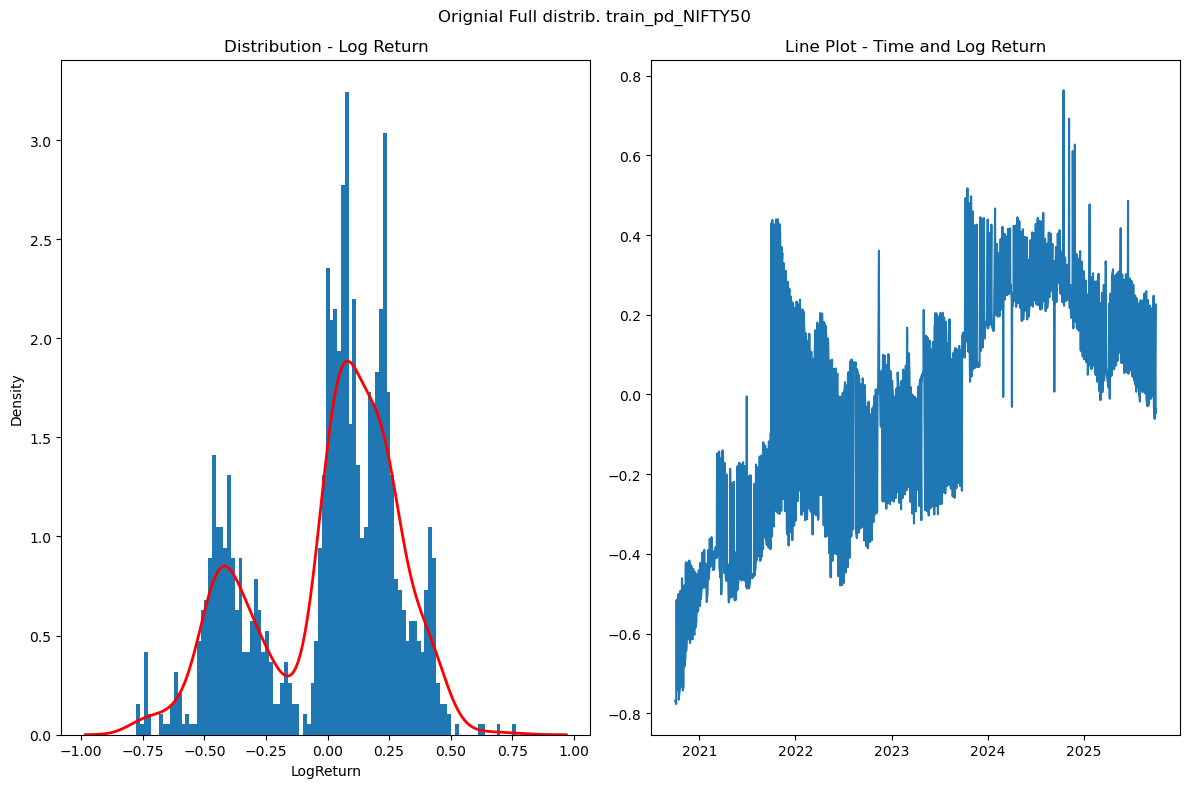

In [39]:
for key, df in train_dfs.items():
    title = 'Orignial Full distrib. ' + key 
    x = df.index
    y = df['LogReturn']
    plot_graph(x, y, title)


### Memory Optimization

Datasets are huge in Optiver, so:

    Downcast columns (float64 → float32, int64 → int32).

    Use category dtype for stock_id.

    Save intermediate results as feather/parquet instead of CSV.


In [40]:
def reduce_memory_usage(df):
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
            else:
                df[col] = df[col].astype(np.float32)
        else:
            df[col] = df[col].astype('category')
    return df





### Split Train/Valid/Test

Since this is time series:

    Split by time_id (or date), not randomly.

    Example: Train on first 80% of time blocks, validate on next 10%, test on last 10%.

    (Later, use rolling CV for more robustness).

Train → model learns.

Validation → tune hyperparameters.

Test → final unbiased evaluation.

How (time-series case):

Do not shuffle!

Split by time (earlier dates = train, middle = valid, latest = test).

1. Purpose of Each Split

Train set → Used to fit the model parameters (e.g., regression weights, neural net weights).

Validation set → Used to tune hyperparameters (things you don’t directly fit, like learning rate, number of layers, window size, regularization strength). You look at performance on validation data to decide which model configuration is “best.”

Test set → Used once at the very end for an unbiased performance estimate. It mimics future unseen data.

2. Why We Need Validation

If you only had train/test:

You’d try different hyperparameters, but each time you’d be peeking at the test set.

This makes the test set “contaminated” because you’re indirectly fitting to it.

So the validation set is a sandbox where you’re allowed to try things. The test is your final exam where you can’t look ahead.

3. Time Series Specifics

In time series, you cannot shuffle because future must never leak into the past.

Train → earlier dates (model learns patterns).

Validation → the “next chunk” of time. You try hyperparameters and see how the model forecasts.

Test → the most recent chunk. Used only at the end for unbiased evaluation.

In [41]:
train_dfs['train_pd_BOVESPA'].index.max()

Timestamp('2025-10-01 00:00:00')

In [42]:
train_dfs['train_pd_BOVESPA'].index.min()

Timestamp('2020-10-01 00:00:00')

In [43]:
split_idx = int(len(train_dfs['train_pd_BOVESPA'].index) * 0.8)
train_dfs['train_pd_BOVESPA'][:split_idx]

,LogReturn
Date,
2020-10-01,-0.426322
2020-10-02,-0.436828
2020-10-05,-0.315950
2020-10-06,-0.169568
2020-10-07,-0.178290
...,...
2024-09-24,0.154094
2024-09-25,0.126717
2024-09-26,0.152534


In [44]:
train_dfs['train_pd_BOVESPA'][train_dfs['train_pd_BOVESPA'].index < '2024-10-01']

,LogReturn
Date,
2020-10-01,-0.426322
2020-10-02,-0.436828
2020-10-05,-0.315950
2020-10-06,-0.169568
2020-10-07,-0.178290
...,...
2024-09-24,0.154094
2024-09-25,0.126717
2024-09-26,0.152534


In [45]:
train_sets = {}
valid_sets = {}
test_sets = {}

for key, df in train_dfs.items():
    split_train = int(len(df) * 0.8)
    split_valid = int(len(df) * 0.9)


    # Split the data
    train_sets[key] = df[:split_train]
    valid_sets[key] = df[split_train:split_valid]
    test_sets[key] = df[split_valid:]

In [46]:
os.getcwd()

'/home/sobottka/BSE/Master_Thesis/bse-thesis-synthetic-data/data/processed_files'

In [50]:
# Create directories if they don't exist
# os.makedirs('data/processed_files/train', exist_ok=True)
# os.makedirs('data/processed_files/valid', exist_ok=True)
# os.makedirs('data/processed_files/test', exist_ok=True)

# Export each dataset
for key in train_sets.keys():
    # Get market name from key (e.g., 'train_pd_BOVESPA' -> 'BOVESPA')
    market = key.split('_')[-1]
    
    # Export train set
    train_sets[key].to_parquet(f'train/{market}_train.parquet')
    
    # Export validation set
    valid_sets[key].to_parquet(f'valid/{market}_valid.parquet')
    
    # Export test set
    test_sets[key].to_parquet(f'test/{market}_test.parquet')
    
    print(f"Exported {market} datasets")

print("\nAll datasets exported successfully!")

Exported SHANGHAI datasets
Exported BOVESPA datasets
Exported MSCI datasets
Exported FTSE datasets
Exported NIFTY50 datasets

All datasets exported successfully!
